<a href="https://colab.research.google.com/github/clementeaf/codingDojo-DS/blob/main/week4/Ejercicio_Visualizaci%C3%B3n_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
filename = '/content/drive/MyDrive/US GDP vs Debt.xlsx'
df = pd.read_excel(filename)

### 1.- Contenido del documento

In [ ]:
# Obtener información sobre las columnas
columnas = df.columns.tolist()
# Obtener tipos de datos por columna
tipos_de_datos = df.dtypes
# Obtener una descripción básica de los datos
descripcion = df.describe()

print("Columnas:")
print(columnas)
print("\nTipos de datos por columna:")
print(tipos_de_datos)
print("\nDescripción de los datos:")
print(descripcion)

### 2.- Conocer datos faltantes por columna

In [ ]:
# Obtener datos faltantes, nulos o indefinidos por columna
datos_faltantes_por_columna = df.isnull().sum()
print("\nDatos faltantes, nulos o indefinidos por columna:")
print(datos_faltantes_por_columna)

### 3.- Conocer porcentage de datos faltantes en columna "Total Public Debt($mil)", respecto del total de datos en dicha columna

In [ ]:
# Obtener el total de datos en la columna "Total Public Debt ($mil)"
total_datos_total_public_debt = df["Total Public Debt ($mil)"].shape[0]

# Obtener la cantidad de datos faltantes en la columna "Total Public Debt ($mil)"
datos_faltantes_total_public_debt = datos_faltantes_por_columna["Total Public Debt ($mil)"]

# Calcular el porcentaje de datos faltantes
porcentaje_faltantes_total_public_debt = (datos_faltantes_total_public_debt / total_datos_total_public_debt) * 100

print(f"Porcentaje de datos faltantes en 'Total Public Debt ($mil)': {porcentaje_faltantes_total_public_debt:.2f}%")

### 4.- En consideración de lo obtenido anteriormente, se decide proceder con una estrategia consistente en la imputación de valores.

In [ ]:
# Imputar valores faltantes con la media de la columna
media_total_public_debt = df["Total Public Debt ($mil)"].mean()
df["Total Public Debt ($mil)"].fillna(media_total_public_debt, inplace=True)

# Verificar que ya no hay datos faltantes
datos_faltantes_por_columna_actualizados = df.isnull().sum()
print("\nDatos faltantes, nulos o indefinidos por columna (actualizados):")
print(datos_faltantes_por_columna_actualizados)
df

### 5.- Primeras ideas a considerar para el análisis:
######  - Tendencias de crecimiento en la deuda a lo largo del tiempo.
######  - Relaciones entre el crecimiento de la deuda y otras variables económicas como el PIB.
######  - Análisis de la deuda pública con diferentes períodos o segmentos de tiempo.
######  - Identificación de picos o tendencias significativas en el crecimiento de la deuda.
######  - Comparación del crecimiento de la duda con otros países o regiones

###### Tendencias de crecimiento en la deuda a lo largo del tiempo.

In [ ]:
# Ordenar el DataFrame por la columna "Quarter" para asegurar que los datos estén en orden cronológico
df.sort_values(by='Quarter', inplace=True)

# Utilizar escala lineal en el eje Y
fig = px.line(df, x='Quarter', y='Total Public Debt ($mil)',
              labels={'Total Public Debt ($mil)': 'Deuda Pública Total ($mil)'})

# Aplicar muestreo aleatorio para reducir la cantidad de puntos en la línea morada
def apply_random_sampling(series, max_points=1000):
    if len(series) <= max_points:
        return series
    else:
        return series.sample(max_points, random_state=1)

fig.data[0].y = apply_random_sampling(df['Total Public Debt ($mil)'])

# Configurar diseño del gráfico
fig.update_layout(title='Tendencias de crecimiento de la deuda a lo largo del tiempo',
                  xaxis_title='Quarter',
                  yaxis_title='Total Public Debt ($mil)',
                  xaxis=dict(tickangle=45, tickmode='auto', nticks=20),  # Rotar etiquetas y ajustar ticks en eje X
                  yaxis=dict(tickmode='auto', nticks=10),  # Ajustar ticks en eje Y
                  hovermode='x unified',
                  template='plotly_white',
                  height=600)  # Aumentar el tamaño del gráfico

# Mostrar el gráfico interactivo
fig.show()

### Relaciones entre el crecimiento de la deuda y otras variables económicas como el PIB.

###### En la gráfica de rastreo, se muestran dos líneas que representan dos variables diferentes. La línea azul muestra la evolución de la "Deuda Total Pública" a lo largo de diferentes períodos (cuartos) en el tiempo. Observamos que esta línea tiene cambios y fluctuaciones a medida que avanzan los cuartos, lo que indica que la deuda pública puede variar en diferentes momentos.

###### Por otro lado, la línea anaranjada muestra el "Porcentaje de Deuda con respecto al PIB" en esos mismos períodos. Esta línea nos muestra cómo la deuda pública se relaciona con el Producto Interno Bruto (PIB) del país. Si la línea anaranjada está por encima de la línea azul, significa que la deuda es mayor en relación con el PIB, lo que puede indicar un mayor nivel de endeudamiento del país. Si la línea anaranjada está por debajo de la línea azul, indica que la deuda es menor en relación con el PIB, lo que puede sugerir una menor carga de endeudamiento.

###### En resumen, la gráfica de rastreo nos permite visualizar cómo la "Deuda Total Pública" y el "Porcentaje de Deuda con respecto al PIB" han variado en diferentes períodos de tiempo. Es una herramienta útil para entender la relación entre ambas variables y cómo han influido en la economía a lo largo del tiempo.

Varianza de 'Total Public Debt ($mil)' respecto a 'Deuda_PIB_Porcentaje': 6506316659606.8


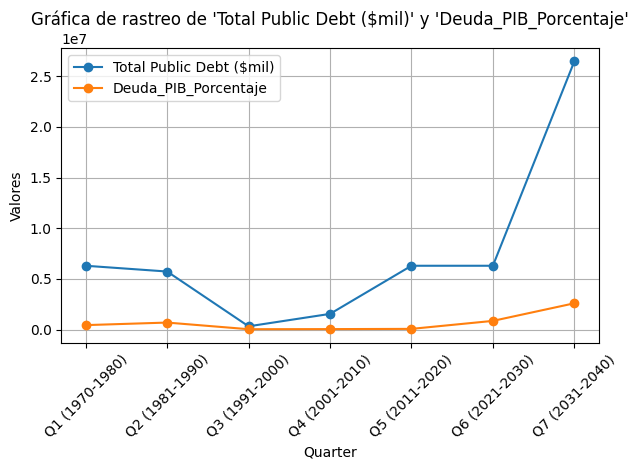

In [17]:
# Datos
quarter = ["Q1 (1970-1980)", "Q2 (1981-1990)", "Q3 (1991-2000)", "Q4 (2001-2010)", "Q5 (2011-2020)", "Q6 (2021-2030)", "Q7 (2031-2040)"]
total_public_debt = [6.295722e+06, 5.726324e+06, 3.160970e+05, 1.542482e+06, 6.295722e+06, 6.295722e+06, 2.647724e+07]
deuda_pib_porcentaje = [4.337927e+05, 6.856194e+05, 2.975627e+04, 3.957034e+04, 6.250988e+04, 8.511951e+05, 2.589085e+06]

# Función para calcular la varianza
def calcular_varianza(datos1, datos2):
    n = len(datos1)
    if n != len(datos2):
        raise ValueError("Los conjuntos de datos deben tener la misma longitud.")

    media1 = sum(datos1) / n
    media2 = sum(datos2) / n

    varianza = sum((x - media1) * (y - media2) for x, y in zip(datos1, datos2)) / n
    return varianza

# Calcular la varianza
varianza_debt_vs_pib = calcular_varianza(total_public_debt, deuda_pib_porcentaje)
print("Varianza de 'Total Public Debt ($mil)' respecto a 'Deuda_PIB_Porcentaje':", varianza_debt_vs_pib)

# Graficar
plt.plot(quarter, total_public_debt, label="Total Public Debt ($mil)", marker='o')
plt.plot(quarter, deuda_pib_porcentaje, label="Deuda_PIB_Porcentaje", marker='o')
plt.xlabel("Quarter")
plt.ylabel("Valores")
plt.title("Gráfica de rastreo de 'Total Public Debt ($mil)' y 'Deuda_PIB_Porcentaje'")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotar los labels para que sean legibles
plt.tight_layout()  # Ajustar el layout para evitar cortar los labels
plt.show()

###### Análisis de la deuda pública con diferentes períodos o segmentos de tiempo.

In [ ]:
# Convertir la columna "Quarter" a formato de fecha
df['Quarter'] = pd.to_datetime(df['Quarter'])

# Ordenar el DataFrame por la columna "Quarter" para asegurar que los datos estén en orden cronológico
df.sort_values(by='Quarter', inplace=True)

# Crear el gráfico de líneas interactivo con Plotly
fig = go.Figure()

# Segmentos de tiempo para el análisis (puedes ajustar estos valores según tus necesidades)
segmentos = [
    ('2000-01-01', '2010-12-31', '2000-2010'),
    ('2011-01-01', '2020-12-31', '2011-2020'),
    ('2021-01-01', '2023-12-31', '2021-2023')
]

# Generar un gráfico de líneas para cada segmento de tiempo
for fecha_inicio, fecha_fin, etiqueta in segmentos:
    segmento_df = df.loc[(df['Quarter'] >= fecha_inicio) & (df['Quarter'] <= fecha_fin)]
    fig.add_trace(go.Scatter(x=segmento_df['Quarter'], y=segmento_df['Total Public Debt ($mil)'],
                             mode='lines+markers', line=dict(width=2),
                             name=f'Deuda Pública ({etiqueta})'))

# Configurar diseño del gráfico
fig.update_layout(title='Análisis de la deuda pública en diferentes segmentos de tiempo',
                  xaxis_title='Quarter',
                  yaxis_title='Total Public Debt ($mil)',
                  xaxis=dict(tickangle=45, tickmode='auto', nticks=20),  # Rotar etiquetas y ajustar ticks en eje X
                  hovermode='x unified',
                  legend=dict(orientation='h'),
                  template='plotly_white',
                  height=600)  # Aumentar el tamaño del gráfico

# Mostrar el gráfico interactivo
fig.show()

###### Identificación de picos o tendencias significativas en el crecimiento de la deuda.